In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep



def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'1000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now') #pravi se novi stubac timestamp sa trenutnim vremenom 
    df

    if not os.path.isfile(r'C:\Users\Korisnik\Desktop\DataAnalyst\Python\Podaci-za-analizu\CSV-za-vjezbu\CC-python-pandas-matplotlib-master\API1.csv'):
        df.to_csv(r'C:\Users\Korisnik\Desktop\DataAnalyst\Python\Podaci-za-analizu\CSV-za-vjezbu\CC-python-pandas-matplotlib-master\API1.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Korisnik\Desktop\DataAnalyst\Python\Podaci-za-analizu\CSV-za-vjezbu\CC-python-pandas-matplotlib-master\API1.csv', mode='a', header=False)
        
    



for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()





API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


In [2]:
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x) #ljepsi format brojeva


df = pd.read_csv(r'C:\Users\Korisnik\Desktop\DataAnalyst\Python\Podaci-za-analizu\CSV-za-vjezbu\CC-python-pandas-matplotlib-master\API1.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10951,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19673006.00000,...,52.16280,1413195532589.29004,NaN,2024-04-04T13:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 15:37:49.193647
1,1,1027,Ethereum,ETH,ethereum,8719,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120068372.18484,...,15.92290,404123277607.19000,NaN,2024-04-04T13:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 15:37:49.193647
2,2,825,Tether USDt,USDT,tether,81219,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,106149786847.07359,...,4.18350,109971401516.94000,NaN,2024-04-04T13:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-04 15:37:49.193647
3,3,1839,BNB,BNB,bnb,2130,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149535422.54104,...,3.47370,88163404909.31000,NaN,2024-04-04T13:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 15:37:49.193647
4,4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,444810959.19311,...,3.30260,108013030161.78000,NaN,2024-04-04T13:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 15:37:49.193647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,995,2916,Nimiq,NIM,nimiq,13,2018-07-10T00:00:00.000Z,['mineable'],21000000000.00000,10448026767.80565,...,0.00060,30775237.14000,NaN,2024-04-04T14:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 16:19:30.499785
9996,996,8567,HAPI Protocol,HAPI,hapi-one,32,2021-02-23T00:00:00.000Z,"['cybersecurity', 'oracles', 'dao-maker', 'poo...",NaN,713382.67881,...,0.00000,15700224.69000,NaN,2024-04-04T14:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xd9c2d319cd7e6177336b0a9c93c21cb48d84fb54,2024-04-04 16:19:30.499785
9997,997,6929,Hegic,HEGIC,hegic,66,2020-09-07T00:00:00.000Z,"['decentralized-exchange-dex-token', 'defi', '...",3012009888.00000,703727349.19585,...,0.00000,65404331.44000,12087802.20105,2024-04-04T14:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x584bC13c7D411c00c01A62e8019472dE68768430,2024-04-04 16:19:30.499785
9998,998,6187,Serum,SRM,serum,198,2020-08-04T00:00:00.000Z,"['decentralized-exchange-dex-token', 'defi', '...",10161000000.00000,263244669.00000,...,0.00060,587984524.44000,21676911.59323,2024-04-04T14:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-04 16:19:30.499785


In [3]:
df['timestamp'] = pd.to_datetime('now')


df.set_index('name', inplace=True)

df3 = df.loc['SingularityNET',['quote.USD.last_updated', 'quote.USD.price']]
df4 = pd.DataFrame(df3)
df4

,quote.USD.last_updated,quote.USD.price
name,,
SingularityNET,2024-04-04T13:36:00.000Z,1.13413
SingularityNET,2024-04-04T13:37:00.000Z,1.13416
SingularityNET,2024-04-04T13:38:00.000Z,1.13559
SingularityNET,2024-04-04T13:39:00.000Z,1.13451
SingularityNET,2024-04-04T13:40:00.000Z,1.13727
SingularityNET,2024-04-04T13:41:00.000Z,1.13765
SingularityNET,2024-04-04T14:15:00.000Z,1.13665
SingularityNET,2024-04-04T14:15:00.000Z,1.13665
SingularityNET,2024-04-04T14:17:00.000Z,1.13035


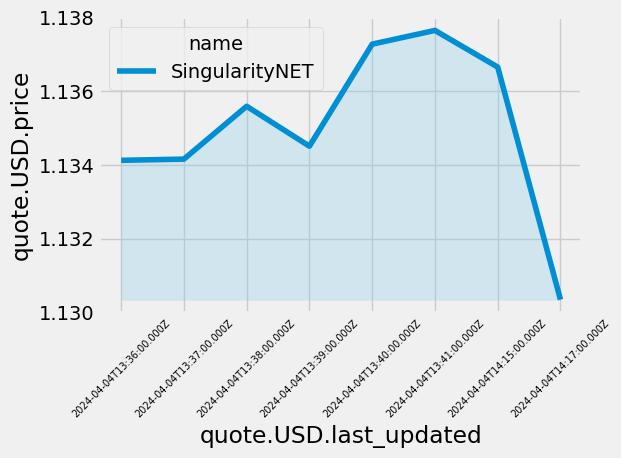

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

#plt.figure(figsize=(10, 6))

sns.lineplot(x='quote.USD.last_updated', y='quote.USD.price',hue='name', data=df4)


y_min = df4['quote.USD.price'].min()
plt.fill_between(df4['quote.USD.last_updated'], y_min, df4['quote.USD.price'], color='skyblue', alpha=0.3, interpolate=True)



plt.xticks(rotation=45, fontsize=7)
plt.tight_layout()

In [10]:
print(sns.axes_style())


{'axes.facecolor': '#EAEAF2', 'axes.edgecolor': 'white', 'axes.grid': True, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': 'white', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.round: 'round'>, 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}
